In [1]:
from datetime import datetime
from huggingface_hub import list_models
# Viz imports
import pandas as pd
#
import matplotlib.pyplot as plt
import seaborn as sns

c:\SRMNWork\projects\ab\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# OSS LLM inventory analysis

*Huggingface* happens to be one of the most popular model store for all AI/AGI models. This experiment tries to explore the rate at which the LLMs are released to production based on data registered at huggingface.


In [2]:
llm_models = list(
    list_models(
        filter = 'llm',
        sort='downloads', direction = -1
    )
)
print(f"Total number of models: {len(llm_models)}")

Total number of models: 932


**Extracting relevant data**

In [3]:
llm_models_df = pd.DataFrame(list(
    map(
        lambda m: {'Name': m.id,
                   'Created': m.created_at,
                   'Downloads': m.downloads
                   }, llm_models
    ))
)

In [4]:
llm_models_df.head()

,Name,Created,Downloads
0,h2oai/h2ovl-mississippi-800m,2024-10-16 23:14:07+00:00,124024
1,h2oai/h2ovl-mississippi-2b,2024-10-15 18:15:29+00:00,119824
2,allenai/wildguard,2024-06-15 03:32:22+00:00,20824
3,llm-blender/PairRM,2023-11-06 07:08:24+00:00,11599
4,bczhou/tiny-llava-v1-hf,2024-01-11 14:41:33+00:00,10719


AttributeError: module 'matplotlib.pyplot' has no attribute 'Title'

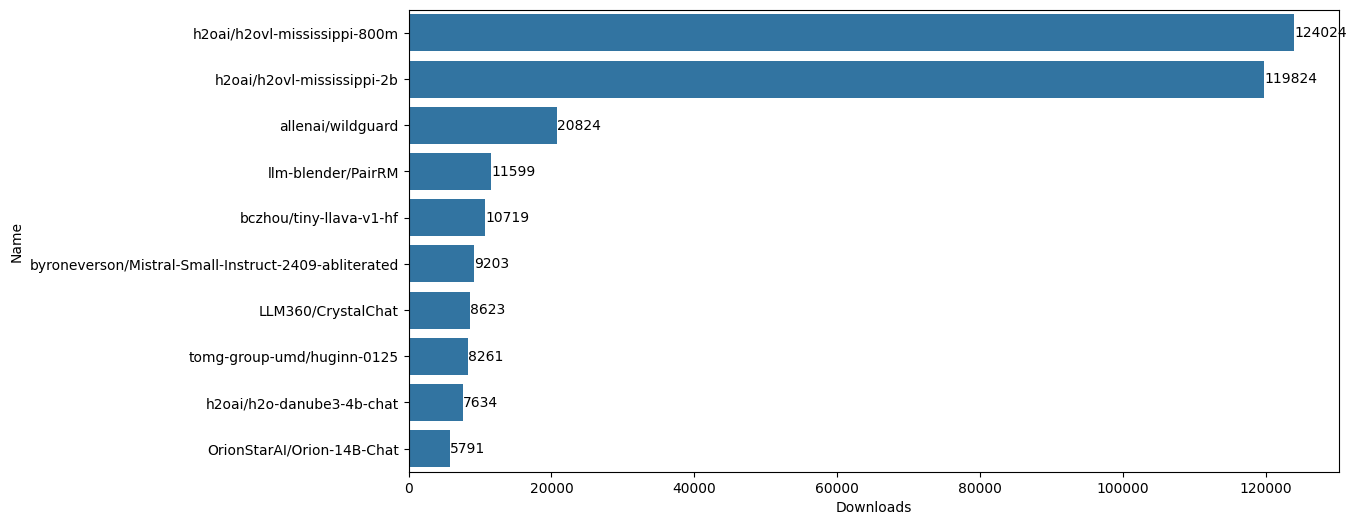

In [9]:
plt.figure(figsize = (12,6))
ax = sns.barplot(x='Downloads', y = 'Name', data = llm_models_df.head(10))
ax.bar_label(ax.containers[0])
plt.Title('Top 10 LLM models this weeek')

**Trend**

In [6]:
llm_models_df['Week'] = llm_models_df['Created'].dt.to_period('w').astype(str)
d = llm_models_df.groupby('Week')['Name'].count().reset_index()
d.columns = ['Week', 'Count']
d['MovingAvg'] =d['Count'].rolling(window=3, min_periods=1).mean()

C:\Users\anant\AppData\Local\Temp\ipykernel_9420\1813356545.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  llm_models_df['Week'] = llm_models_df['Created'].dt.to_period('w').astype(str)
C:\Users\anant\AppData\Local\Temp\ipykernel_9420\1813356545.py:1: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  llm_models_df['Week'] = llm_models_df['Created'].dt.to_period('w').astype(str)


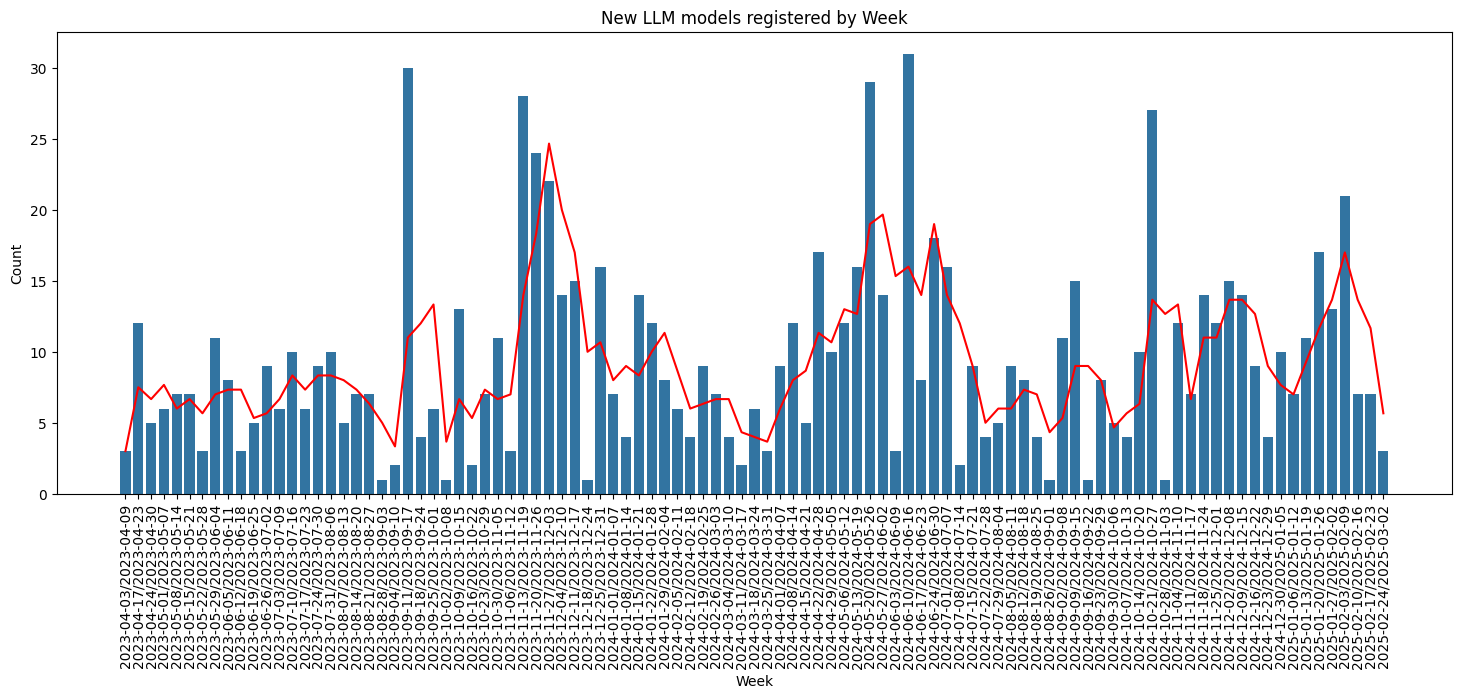

In [7]:


plt.figure(figsize=(18, 6))
sns.barplot(x = 'Week', y ='Count', data = d)
sns.lineplot(x = 'Week', y = 'MovingAvg', data =d, color = 'red')
plt.xticks(rotation=90)
plt.title("New LLM models registered by Week")
plt.show()


## Conclusion

it is shown that on an average around 9 new models are being published week over week for 99 weeks. There are a few weeks where **30+** models have been published.
